In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import speckle_stuffs as spkstf
import pickle
import scipy
import os
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
rootff = ''
root_folder = rootff+'/62576429239087/'

pickles = [root_folder+ff for ff in os.listdir(root_folder) if ff.split('.')[-1]=='pickle']
pickles.sort()

In [147]:
colors = {}

# initialize a dictionary where we will put the cmap
for picklesource in pickles:
    filehandler = open(picklesource, 'rb')
    [extr_traces, extr_footprints, dpars] = pickle.load(filehandler)
    filehandler.close()
    colors[str(dpars['frames_no'])] = 0

# generate the cmap depending on the number of keys
# and associate the color to the key
kk = list(colors.keys())
kk.sort(key=lambda x:int(x))
# cubehelix, GnBu_d, Blues
pall = sns.color_palette("viridis_r", len(kk))
for i,k in enumerate(kk):
    colors[k] = pall[i]

# populate a dataframe
df = pd.DataFrame(columns=['frames_no','guessed_sources','scrp'])
for picklesource in pickles:
    filehandler = open(picklesource, 'rb')
    [extr_traces, extr_footprints, dpars] = pickle.load(filehandler)
    filehandler.close()
    scrp = dpars['scree_plot'][1:100]
    df = df.append({
        'frames_no':int(dpars['frames_no']),
        'guessed_sources':int(dpars['components']),
        'scrp':scrp
    }, ignore_index=True)

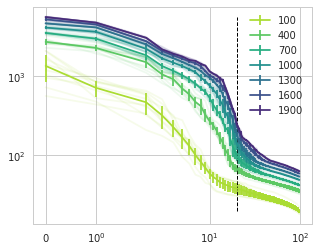

In [249]:
sns.set(style="whitegrid", palette="colorblind")

fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)

minn = 10E7
maxx = 0

for i,k in enumerate(kk):
    ds = np.array(df[df['frames_no']==int(k)].scrp)
    ax.errorbar(range(len(ds[0])), np.mean(ds), yerr=np.std(ds), c=colors[k], label=k)
    for yy in ds:
        plt.plot(yy, c=colors[k], alpha=0.1)
    minn = np.min([minn, np.min(np.mean(ds))])
    maxx = np.max([maxx, np.max(np.mean(ds))])
ax.vlines(20, minn, maxx, linestyles='dashed', linewidths=1)
ax.legend()
ax.set_yscale('symlog')
ax.set_xscale('symlog')

plt.show()

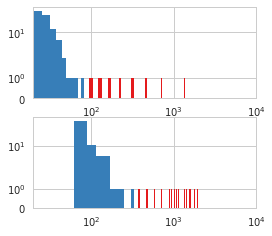

In [289]:
sns.set(style="whitegrid", palette="colorblind")

nds = len(kk)
fig = plt.figure(figsize=(4,3.7))

for idx, k in enumerate([100,1900]):
    tmpv = np.array(df[df['frames_no']==int(k)].scrp)
    tmpv = np.mean(([np.log(x) for x in tmpv]), axis=0)
    
    kmeans = KMeans(n_clusters=2).fit(tmpv.reshape((-1, 1)))
    labels = kmeans.labels_
    components = sum(labels==labels[0])

    xxx = np.arange(1, len(tmpv)+1)
    tmpv = np.array(df[df['frames_no']==int(k)].scrp)
    tmpv = np.mean(tmpv)

    labels0 = tmpv[labels==labels[0]]
    labels1 = tmpv[labels==labels[-1]]

    plt.subplot(2,1,idx+1)
#     # create one bin for every eigenvalue. use the labels to do that
    ty = 1
    binns = [(i+j*np.power(i,0.4)) for i in labels0[::-1] for j in [-ty, ty]]
    plt.hist(labels0, binns, color='#e41a1c')  
    plt.hist(labels1, color='#377eb8')
    plt.xscale('symlog')
    plt.yscale('symlog')
    plt.xlim([20,10E3])
    
plt.show()